In [1]:
import pandas as pd
import lightgbm as lgb
import matplotlib
from sklearn.model_selection import train_test_split
import seaborn as sns

/home/sa6523/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/sa6523/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/sa6523/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/sa6523/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [2]:
df_test = pd.read_csv("merged_test.csv", header=None)

In [3]:
df_test.columns = ["tracing_id", "zpid_hash", "feature1", "feature2", "feature3", "feature4", "feature5", "feature6", "feature7", "feature8","user_id_hash", "timestamp_session", "user_session_id", "order", "submit", "fav", "click"]

In [4]:
df_test.click = df_test.click.replace({ True: 1, False: 0})
df_test.submit = df_test.submit.replace({True: 1, False: 0})
df_test.fav = df_test.fav.replace({True: 1, False: 0})

In [5]:
features = pd.read_csv("2022-07-10.csv")

In [6]:
features.rename(columns={'pid_hashed': 'zpid_hash'}, inplace=True)

In [7]:
features.listing_feature7 = features.listing_feature7.replace({True: 1, False: 0})
features.listing_feature9 = features.listing_feature9.replace({True: 1, False: 0})
features.listing_feature10 = features.listing_feature10.replace({True: 1, False: 0})
features.listing_feature18 = features.listing_feature18.replace({True: 1, False: 0})

In [8]:
features["listing_feature17"] = features["listing_feature17"].replace({'Active': 1, 'Pending': 0, 'Contingent': 2, 'ComingSoon': 3})

In [9]:
features.drop(columns = ["listing_feature8"], inplace = True)

In [10]:
df_test = df_test.merge(features, how = "inner", on = "zpid_hash")

In [11]:
df_test

,tracing_id,zpid_hash,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,listing_feature65,listing_feature66,listing_feature67,listing_feature68,listing_feature69,listing_feature70,listing_feature71,listing_feature72,listing_feature73,listing_feature74
0,62ca195944401fed240b385fa47bd155,0c6bc6449d4d4820898868330d9c5517ca100921,4166,833,83,3333,83,166,1833,3,...,NaN,2.363636,2.783609,60.113797,3.203746,17.583585,1.210037,3.030211,0.959884,1.041793
1,62ca995fbb5ffb29dd20af5be62fb7fa,0c6bc6449d4d4820898868330d9c5517ca100921,3333,1773,66,666,66,271,133,66,...,NaN,2.363636,2.783609,60.113797,3.203746,17.583585,1.210037,3.030211,0.959884,1.041793
2,62cad432a1450d0fe6b06efce59dcd05,0c6bc6449d4d4820898868330d9c5517ca100921,427,85,2486,6341,8,17,2495,2675,...,NaN,2.363636,2.783609,60.113797,3.203746,17.583585,1.210037,3.030211,0.959884,1.041793
3,62ca2f34ca8e8b95f3cca333b0bf6cfa,0c6bc6449d4d4820898868330d9c5517ca100921,295,47,4,7659,4,9,9,4,...,NaN,2.363636,2.783609,60.113797,3.203746,17.583585,1.210037,3.030211,0.959884,1.041793
4,62ca19adf8267be0db6b5522df7b42a0,0c6bc6449d4d4820898868330d9c5517ca100921,752,107,498,8280,10,21,508,498,...,NaN,2.363636,2.783609,60.113797,3.203746,17.583585,1.210037,3.030211,0.959884,1.041793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10950448,62cb663678ec1afe2e40e768f9519c52,f4c6d6140198fc60d08da1c677c2928001102200,7619,925,47,6190,47,95,53,47,...,NaN,NaN,2.286932,16.761905,1.962121,6.285714,1.000000,1.333333,1.000000,1.000000
10950449,62cb663678ec1afe2e40e768f9519c52,e440941b57cf2eeb8a9ba6f1a21a71f71558a729,7619,925,47,6190,47,95,53,47,...,NaN,NaN,2.386364,16.761905,2.068182,6.285714,1.500000,1.333333,1.000000,1.000000
10950450,62cb664f0bde6dc258157abefdd5a8d4,1cb17f63d31e97f5b66617e9ace455dccfdf0088,9761,1831,4,9619,1010,1737,9,4,...,NaN,NaN,1.888393,24.888889,1.582822,9.055556,2.181818,1.833333,1.000000,1.000000
10950451,62cb6678307c4dfe9cb639dd8f64d329,211e1ecb80578b842946630db20b962d11e8bb6f,8484,303,0,5575,141,0,60,30,...,NaN,NaN,1.720430,18.600000,1.638655,7.933333,1.153846,1.733333,1.250000,1.066667


In [12]:
df_1 = df_test.groupby("tracing_id")["submit"].sum()

In [13]:
df_2 = df_test.groupby("tracing_id")["fav"].sum()

In [14]:
df_sub = df_1[df_1 != 0].to_frame().reset_index()

In [15]:
df_fav = df_2[df_2 != 0].to_frame().reset_index()

In [16]:
trace_2 = df_fav["tracing_id"].to_list()

In [17]:
trace = df_sub["tracing_id"].to_list()

In [18]:
df_test_submit = df_test[df_test['tracing_id'].isin(trace)]

In [19]:
df_test_fav = df_test[df_test['tracing_id'].isin(trace_2)]

In [20]:
tracing_id_test = df_test.groupby("tracing_id")["tracing_id"].count().to_numpy()

In [21]:
tracing_id_sub_test = df_test_submit.groupby("tracing_id")["tracing_id"].count().to_numpy()

In [22]:
tracing_id_fav_test = df_test_fav.groupby("tracing_id")["tracing_id"].count().to_numpy()

In [23]:
X_test = df_test.copy()
X_test.drop(columns=["click", "tracing_id", "user_session_id","user_id_hash", "timestamp_session", "zpid_hash", "order", "fav", "submit"], inplace=True)
y_test = df_test['click']

In [24]:
X_test_sub = df_test_submit.copy()
X_test_sub.drop(columns=["click", "tracing_id", "user_session_id","user_id_hash", "timestamp_session", "zpid_hash", "order", "fav", "submit"], inplace=True)
y_test_sub = df_test_submit['submit']

In [25]:
X_test_fav = df_test_fav.copy()
X_test_fav.drop(columns=["click", "tracing_id", "user_session_id","user_id_hash", "timestamp_session", "zpid_hash", "order", "fav", "submit"], inplace=True)
y_test_fav = df_test_fav['fav']

In [26]:
df_train = pd.read_csv("merged_train.csv", header=None)

In [27]:
df_train.columns = ["tracing_id", "zpid_hash", "feature1", "feature2", "feature3", "feature4", "feature5", "feature6", "feature7", "feature8","user_id_hash", "timestamp_session", "user_session_id", "order", "submit", "fav", "click"]

In [28]:
df_train.click = df_train.click.replace({ True: 1, False: 0})
df_train.submit = df_train.submit.replace({True: 1, False: 0})
df_train.fav = df_train.fav.replace({True: 1, False: 0})

In [29]:
df_train = df_train.merge(features, how = "inner", on = "zpid_hash")

In [30]:
df_train

,tracing_id,zpid_hash,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,listing_feature65,listing_feature66,listing_feature67,listing_feature68,listing_feature69,listing_feature70,listing_feature71,listing_feature72,listing_feature73,listing_feature74
0,62ca168a98fd2bedc46c779d5d67fe63,463897814a03102a0051b4b389322c38467e3228,3125,625,812,3418,1809,125,3875,1235,...,NaN,2.111111,3.202477,28.415501,1.786631,8.395688,2.836364,2.115385,0.955457,1.046620
1,62ca69d177a1bd850e52dd048d7e9c85,463897814a03102a0051b4b389322c38467e3228,9324,6134,8662,8178,2335,1063,8675,3863,...,NaN,2.111111,3.202477,28.415501,1.786631,8.395688,2.836364,2.115385,0.955457,1.046620
2,62caf50bea1dcf0c7544597bf6bd34af,463897814a03102a0051b4b389322c38467e3228,3846,5,2384,3846,737,153,2461,43,...,NaN,2.111111,3.202477,28.415501,1.786631,8.395688,2.836364,2.115385,0.955457,1.046620
3,62ca34aff0dad706e3c69e55e8fc2c99,463897814a03102a0051b4b389322c38467e3228,9712,5971,4,8146,1378,1562,9,4,...,NaN,2.111111,3.202477,28.415501,1.786631,8.395688,2.836364,2.115385,0.955457,1.046620
4,62ca455572587787fa9d4d8191be981b,463897814a03102a0051b4b389322c38467e3228,8297,8060,14,8857,14,206,28,14,...,NaN,2.111111,3.202477,28.415501,1.786631,8.395688,2.836364,2.115385,0.955457,1.046620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25563497,62cb624a3eae646cbdda04f7141c6faa,8e4cfee06204cb28d3c5724c6b8c3acd16d6610d,9594,4633,5602,8121,1006,10,5307,5302,...,NaN,2.000000,0.051560,45.255009,0.077795,12.854281,0.557502,2.391621,0.979483,1.020947
25563498,62cb624a3eae646cbdda04f7141c6faa,33a81e148d4a1c1d30a5d35f17ef6598e908ebb2,9594,50,5602,8121,665,10,5307,5302,...,NaN,2.000000,0.036828,45.255009,0.077795,12.854281,0.418126,2.391621,0.979483,1.020947
25563499,62cb624a3eae646cbdda04f7141c6faa,6ca2a79c843b624d95ce6c69e695c44ad1f4f54f,9594,4966,5602,8121,2164,10,5307,5302,...,NaN,2.000000,0.051560,45.255009,0.077795,12.854281,0.418126,2.391621,0.979483,1.020947
25563500,62cb63c7381ba82fd59a995e897e397d,7a09918a084f5de96cd4562e23b250142a047804,9761,47,4,9619,4,9,9,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
tracing_id_train = df_train.groupby("tracing_id")["tracing_id"].count().to_numpy()

In [32]:
X_train = df_train.copy()
X_train.drop(columns=["click", "tracing_id", "user_session_id","user_id_hash", "timestamp_session", "zpid_hash", "order", "fav", "submit"], inplace=True)
y_train= df_train['click']

In [41]:
X_train = df_train.copy()
X_train.drop(columns=["click", "tracing_id", "user_session_id","user_id_hash", "timestamp_session", "zpid_hash", "order", "fav", "submit"], inplace=True)
y_train= df_train['submit']

In [34]:
y_train= df_train['fav']

In [42]:
ranker1 = lgb.LGBMRanker(
                    objective="lambdarank",
                    boosting_type = "gbdt",
                    n_estimators = 10,
                    importance_type = "gain",
                    metric= "ndcg",
                    num_leaves = 10,
                    learning_rate = 0.05,
                    max_depth = -1,
                    label_gain =[i for i in range(max(y_train.max(), y_test_sub.max()) + 1)])

In [43]:
ranker2 = lgb.LGBMRanker(
                    objective="lambdarank",
                    boosting_type = "gbdt",
                    n_estimators = 10,
                    importance_type = "gain",
                    metric= "map",
                    num_leaves = 10,
                    learning_rate = 0.05,
                    max_depth = -1,
                    label_gain =[i for i in range(max(y_train.max(), y_test_sub.max()) + 1)])

In [49]:
X_train.drop(columns = ["Unnamed: 0"], inplace=True)
# X_test.drop(columns = ["Unnamed: 0"], inplace=True)
# X_test_fav.drop(columns = ["Unnamed: 0"], inplace=True)
# X_test_sub.drop(columns = ["Unnamed: 0"], inplace=True)

In [38]:
X_test_fav

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,listing_feature0,listing_feature1,...,listing_feature65,listing_feature66,listing_feature67,listing_feature68,listing_feature69,listing_feature70,listing_feature71,listing_feature72,listing_feature73,listing_feature74
6,684,136,5288,8904,13,27,6020,5170,11.341166,11.916667,...,NaN,2.363636,2.783609,60.113797,3.203746,17.583585,1.210037,3.030211,0.959884,1.041793
45,8563,493,23,8095,23,1900,47,23,1.175041,2.583333,...,0.846154,2.363636,6.548691,60.113797,9.743936,17.583585,4.730143,3.030211,1.279845,1.041793
52,9614,4457,4,9619,4,9,9,4,1.175041,2.583333,...,0.846154,2.363636,6.548691,60.113797,9.743936,17.583585,4.730143,3.030211,1.279845,1.041793
76,9235,4270,9,5452,9,270,19,9,1.175041,2.583333,...,0.846154,2.363636,6.548691,60.113797,9.743936,17.583585,4.730143,3.030211,1.279845,1.041793
137,9547,694,4,9619,89,9,9,4,1.175041,2.583333,...,0.846154,2.363636,6.548691,60.113797,9.743936,17.583585,4.730143,3.030211,1.279845,1.041793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10949965,851,5911,1287,7037,37,789,1324,37,0.574019,0.750000,...,NaN,2.100000,0.099313,36.920300,0.242170,11.011534,0.377975,2.645675,0.961944,1.039562
10949966,851,5911,1287,7037,37,789,1324,37,0.561901,0.750000,...,NaN,2.100000,0.180569,36.920300,0.363255,11.011534,0.629959,2.645675,0.961944,1.039562
10949967,851,1126,1287,7037,37,338,1324,37,0.494327,6.583334,...,NaN,2.100000,0.812561,36.920300,0.302713,11.011534,0.755951,2.645675,0.961944,1.039562
10949968,851,5911,1287,7037,37,789,1324,37,0.579340,0.750000,...,NaN,2.100000,0.198626,36.920300,0.393527,11.011534,0.377975,2.645675,0.961944,1.039562


In [39]:
ranker1.fit(
      X=X_train,
      y=y_train,
      group=tracing_id_train,
      eval_set=[(X_train, y_train),(X_test_fav, y_test_fav)],
      eval_group=[tracing_id_train,tracing_id_fav_test],
      eval_at=[1,2,5,10, 20])

[1]	training's ndcg@1: 0.975223	training's ndcg@2: 0.976527	training's ndcg@5: 0.978928	training's ndcg@10: 0.980977	training's ndcg@20: 0.982747	valid_1's ndcg@1: 0.339113	valid_1's ndcg@2: 0.352714	valid_1's ndcg@5: 0.405043	valid_1's ndcg@10: 0.465499	valid_1's ndcg@20: 0.531597
[2]	training's ndcg@1: 0.975258	training's ndcg@2: 0.97658	training's ndcg@5: 0.978994	training's ndcg@10: 0.981094	training's ndcg@20: 0.982866	valid_1's ndcg@1: 0.332014	valid_1's ndcg@2: 0.348107	valid_1's ndcg@5: 0.398194	valid_1's ndcg@10: 0.461389	valid_1's ndcg@20: 0.528711
[3]	training's ndcg@1: 0.975655	training's ndcg@2: 0.977037	training's ndcg@5: 0.979485	training's ndcg@10: 0.981499	training's ndcg@20: 0.983211	valid_1's ndcg@1: 0.345529	valid_1's ndcg@2: 0.36201	valid_1's ndcg@5: 0.414382	valid_1's ndcg@10: 0.47528	valid_1's ndcg@20: 0.539962
[4]	training's ndcg@1: 0.975741	training's ndcg@2: 0.977198	training's ndcg@5: 0.97968	training's ndcg@10: 0.98165	training's ndcg@20: 0.983343	valid_1's 

LGBMRanker(importance_type='gain', label_gain=[0, 1], learning_rate=0.05,
           metric='ndcg', n_estimators=10, num_leaves=10,
           objective='lambdarank')

In [40]:
ranker2.fit(
      X=X_train,
      y=y_train,
      group=tracing_id_train,
      eval_set=[(X_train, y_train),(X_test_fav, y_test_fav)],
      eval_group=[tracing_id_train, tracing_id_fav_test],
      eval_at=[1, 2, 5, 10, 20])

[1]	training's map@1: 0.975223	training's map@2: 0.976235	training's map@5: 0.977672	training's map@10: 0.978519	training's map@20: 0.979012	valid_1's map@1: 0.339113	valid_1's map@2: 0.336621	valid_1's map@5: 0.361371	valid_1's map@10: 0.388971	valid_1's map@20: 0.413472
[2]	training's map@1: 0.975258	training's map@2: 0.976284	training's map@5: 0.97773	training's map@10: 0.9786	training's map@20: 0.979095	valid_1's map@1: 0.332014	valid_1's map@2: 0.332799	valid_1's map@5: 0.356102	valid_1's map@10: 0.38466	valid_1's map@20: 0.409585
[3]	training's map@1: 0.975655	training's map@2: 0.976727	training's map@5: 0.978198	training's map@10: 0.979032	training's map@20: 0.979509	valid_1's map@1: 0.345529	valid_1's map@2: 0.344778	valid_1's map@5: 0.369286	valid_1's map@10: 0.39718	valid_1's map@20: 0.421362
[4]	training's map@1: 0.975741	training's map@2: 0.976873	training's map@5: 0.978365	training's map@10: 0.97918	training's map@20: 0.979653	valid_1's map@1: 0.345802	valid_1's map@2: 0.3

LGBMRanker(importance_type='gain', label_gain=[0, 1], learning_rate=0.05,
           metric='map', n_estimators=10, num_leaves=10,
           objective='lambdarank')

In [50]:
ranker1.fit(
      X=X_train,
      y=y_train,
      group=tracing_id_train,
      eval_set=[(X_train, y_train),(X_test_sub, y_test_sub)],
      eval_group=[tracing_id_train,tracing_id_sub_test],
      eval_at=[1,2,5,10, 20])

[1]	training's ndcg@1: 0.998439	training's ndcg@2: 0.998567	training's ndcg@5: 0.998719	training's ndcg@10: 0.998832	training's ndcg@20: 0.998935	valid_1's ndcg@1: 0.480916	valid_1's ndcg@2: 0.50049	valid_1's ndcg@5: 0.557761	valid_1's ndcg@10: 0.603446	valid_1's ndcg@20: 0.641282
[2]	training's ndcg@1: 0.998463	training's ndcg@2: 0.998589	training's ndcg@5: 0.998744	training's ndcg@10: 0.998868	training's ndcg@20: 0.998964	valid_1's ndcg@1: 0.505344	valid_1's ndcg@2: 0.521901	valid_1's ndcg@5: 0.578519	valid_1's ndcg@10: 0.619162	valid_1's ndcg@20: 0.658017
[3]	training's ndcg@1: 0.998479	training's ndcg@2: 0.998612	training's ndcg@5: 0.998773	training's ndcg@10: 0.998886	training's ndcg@20: 0.998983	valid_1's ndcg@1: 0.509924	valid_1's ndcg@2: 0.529463	valid_1's ndcg@5: 0.580375	valid_1's ndcg@10: 0.622835	valid_1's ndcg@20: 0.659522
[4]	training's ndcg@1: 0.998491	training's ndcg@2: 0.99863	training's ndcg@5: 0.998786	training's ndcg@10: 0.998903	training's ndcg@20: 0.998994	valid_1

LGBMRanker(importance_type='gain', label_gain=[0, 1], learning_rate=0.05,
           metric='ndcg', n_estimators=10, num_leaves=10,
           objective='lambdarank')

In [51]:
ranker2.fit(
      X=X_train,
      y=y_train,
      group=tracing_id_train,
      eval_set=[(X_train, y_train),(X_test_sub, y_test_sub)],
      eval_group=[tracing_id_train,tracing_id_sub_test],
      eval_at=[1, 2, 5, 10, 20])

[1]	training's map@1: 0.998439	training's map@2: 0.99854	training's map@5: 0.998631	training's map@10: 0.998678	training's map@20: 0.998706	valid_1's map@1: 0.480916	valid_1's map@2: 0.482061	valid_1's map@5: 0.514026	valid_1's map@10: 0.535164	valid_1's map@20: 0.54932
[2]	training's map@1: 0.998463	training's map@2: 0.998562	training's map@5: 0.998656	training's map@10: 0.998707	training's map@20: 0.998734	valid_1's map@1: 0.505344	valid_1's map@2: 0.501908	valid_1's map@5: 0.533799	valid_1's map@10: 0.55335	valid_1's map@20: 0.567517
[3]	training's map@1: 0.998479	training's map@2: 0.998584	training's map@5: 0.998681	training's map@10: 0.998728	training's map@20: 0.998755	valid_1's map@1: 0.509924	valid_1's map@2: 0.507252	valid_1's map@5: 0.535209	valid_1's map@10: 0.555331	valid_1's map@20: 0.568922
[4]	training's map@1: 0.998491	training's map@2: 0.998601	training's map@5: 0.998695	training's map@10: 0.998743	training's map@20: 0.998768	valid_1's map@1: 0.508397	valid_1's map@2: 

LGBMRanker(importance_type='gain', label_gain=[0, 1], learning_rate=0.05,
           metric='map', n_estimators=10, num_leaves=10,
           objective='lambdarank')

In [33]:
ranker1.fit(
      X=X_train,
      y=y_train,
      group=tracing_id_train,
      eval_set=[(X_train, y_train),(X_test, y_test)],
      eval_group=[tracing_id_train,tracing_id_test],
      eval_at=[10, 20])

[1]	training's ndcg@10: 0.502367	training's ndcg@20: 0.569678	valid_1's ndcg@10: 0.496851	valid_1's ndcg@20: 0.56502
[2]	training's ndcg@10: 0.511731	training's ndcg@20: 0.577785	valid_1's ndcg@10: 0.506367	valid_1's ndcg@20: 0.573258
[3]	training's ndcg@10: 0.516914	training's ndcg@20: 0.581983	valid_1's ndcg@10: 0.511471	valid_1's ndcg@20: 0.577386
[4]	training's ndcg@10: 0.518597	training's ndcg@20: 0.583256	valid_1's ndcg@10: 0.513259	valid_1's ndcg@20: 0.578729
[5]	training's ndcg@10: 0.520544	training's ndcg@20: 0.584857	valid_1's ndcg@10: 0.515175	valid_1's ndcg@20: 0.5802
[6]	training's ndcg@10: 0.521441	training's ndcg@20: 0.585661	valid_1's ndcg@10: 0.516005	valid_1's ndcg@20: 0.58101
[7]	training's ndcg@10: 0.52238	training's ndcg@20: 0.586419	valid_1's ndcg@10: 0.516834	valid_1's ndcg@20: 0.581679
[8]	training's ndcg@10: 0.522681	training's ndcg@20: 0.586767	valid_1's ndcg@10: 0.517374	valid_1's ndcg@20: 0.582119
[9]	training's ndcg@10: 0.523005	training's ndcg@20: 0.587031

LGBMRanker(importance_type='gain', label_gain=[0, 1], learning_rate=0.05,
           metric='ndcg', n_estimators=10, num_leaves=10,
           objective='lambdarank')

In [34]:
ranker1.fit(
      X=X_train,
      y=y_train,
      group=tracing_id_train,
      eval_set=[(X_train, y_train),(X_test, y_test)],
      eval_group=[tracing_id_train,tracing_id_test],
      eval_at=[1, 2, 5])

[1]	training's ndcg@1: 0.382361	training's ndcg@2: 0.393978	training's ndcg@5: 0.44096	valid_1's ndcg@1: 0.375622	valid_1's ndcg@2: 0.386835	valid_1's ndcg@5: 0.433975
[2]	training's ndcg@1: 0.390062	training's ndcg@2: 0.401905	training's ndcg@5: 0.449769	valid_1's ndcg@1: 0.382993	valid_1's ndcg@2: 0.394671	valid_1's ndcg@5: 0.442955
[3]	training's ndcg@1: 0.397734	training's ndcg@2: 0.408344	training's ndcg@5: 0.455564	valid_1's ndcg@1: 0.390662	valid_1's ndcg@2: 0.401075	valid_1's ndcg@5: 0.448522
[4]	training's ndcg@1: 0.399142	training's ndcg@2: 0.409815	training's ndcg@5: 0.45711	valid_1's ndcg@1: 0.392811	valid_1's ndcg@2: 0.40278	valid_1's ndcg@5: 0.450309
[5]	training's ndcg@1: 0.401683	training's ndcg@2: 0.412135	training's ndcg@5: 0.459266	valid_1's ndcg@1: 0.39525	valid_1's ndcg@2: 0.40481	valid_1's ndcg@5: 0.45248
[6]	training's ndcg@1: 0.402492	training's ndcg@2: 0.413038	training's ndcg@5: 0.460155	valid_1's ndcg@1: 0.396155	valid_1's ndcg@2: 0.405572	valid_1's ndcg@5: 0

LGBMRanker(importance_type='gain', label_gain=[0, 1], learning_rate=0.05,
           metric='ndcg', n_estimators=10, num_leaves=10,
           objective='lambdarank')

In [38]:
ranker2.fit(
      X=X_train,
      y=y_train,
      group=tracing_id_train,
      eval_set=[(X_train, y_train),(X_test, y_test)],
      eval_group=[tracing_id_train, tracing_id_test],
      eval_at=[1, 2, 5, 10, 20])

NameError: name 'ranker2' is not defined

In [22]:
y_train = df_train["submit"]
y_test = df_test_submit["submit"]

In [28]:
ranker2.fit(
      X=X_train,
      y=y_train,
      group=tracing_id_train,
      eval_set=[(X_train, y_train),(X_test, y_test)],
      eval_group=[tracing_id_train, tracing_id_test],
      eval_at=[1, 2, 5, 10, 20])

[1]	training's map@1: 0.998439	training's map@2: 0.99854	training's map@5: 0.998631	training's map@10: 0.998678	training's map@20: 0.998706	valid_1's map@1: 0.99853	valid_1's map@2: 0.99862	valid_1's map@5: 0.998706	valid_1's map@10: 0.998744	valid_1's map@20: 0.998771
[2]	training's map@1: 0.998463	training's map@2: 0.998562	training's map@5: 0.998656	training's map@10: 0.998707	training's map@20: 0.998734	valid_1's map@1: 0.998548	valid_1's map@2: 0.998628	valid_1's map@5: 0.998726	valid_1's map@10: 0.998769	valid_1's map@20: 0.998794
[3]	training's map@1: 0.998479	training's map@2: 0.998584	training's map@5: 0.998681	training's map@10: 0.998728	training's map@20: 0.998755	valid_1's map@1: 0.99856	valid_1's map@2: 0.998641	valid_1's map@5: 0.998747	valid_1's map@10: 0.998785	valid_1's map@20: 0.998809
[4]	training's map@1: 0.998491	training's map@2: 0.998601	training's map@5: 0.998695	training's map@10: 0.998743	training's map@20: 0.998768	valid_1's map@1: 0.998563	valid_1's map@2: 0

LGBMRanker(importance_type='gain', label_gain=[0, 1], learning_rate=0.05,
           metric='map', n_estimators=10, num_leaves=10,
           objective='lambdarank')

In [29]:
ranker1.fit(
      X=X_train,
      y=y_train,
      group=tracing_id_train,
      eval_set=[(X_train, y_train),(X_test, y_test)],
      eval_group=[tracing_id_train, tracing_id_test],
      eval_at=[1, 2, 5, 10, 20])

[1]	training's ndcg@1: 0.998439	training's ndcg@2: 0.998567	training's ndcg@5: 0.998719	training's ndcg@10: 0.998832	training's ndcg@20: 0.998935	valid_1's ndcg@1: 0.99853	valid_1's ndcg@2: 0.998647	valid_1's ndcg@5: 0.998792	valid_1's ndcg@10: 0.998884	valid_1's ndcg@20: 0.998981
[2]	training's ndcg@1: 0.998463	training's ndcg@2: 0.998589	training's ndcg@5: 0.998744	training's ndcg@10: 0.998868	training's ndcg@20: 0.998964	valid_1's ndcg@1: 0.998548	valid_1's ndcg@2: 0.998653	valid_1's ndcg@5: 0.998813	valid_1's ndcg@10: 0.998916	valid_1's ndcg@20: 0.99901
[3]	training's ndcg@1: 0.998479	training's ndcg@2: 0.998612	training's ndcg@5: 0.998773	training's ndcg@10: 0.998886	training's ndcg@20: 0.998983	valid_1's ndcg@1: 0.99856	valid_1's ndcg@2: 0.998666	valid_1's ndcg@5: 0.998838	valid_1's ndcg@10: 0.998929	valid_1's ndcg@20: 0.999019
[4]	training's ndcg@1: 0.998491	training's ndcg@2: 0.99863	training's ndcg@5: 0.998786	training's ndcg@10: 0.998903	training's ndcg@20: 0.998994	valid_1's

LGBMRanker(importance_type='gain', label_gain=[0, 1], learning_rate=0.05,
           metric='ndcg', n_estimators=10, num_leaves=10,
           objective='lambdarank')

In [30]:
y_train = df_train["fav"]
y_test = df_test["fav"]

In [31]:
ranker2.fit(
      X=X_train,
      y=y_train,
      group=tracing_id_train,
      eval_set=[(X_train, y_train),(X_test, y_test)],
      eval_group=[tracing_id_train, tracing_id_test],
      eval_at=[1, 2, 5, 10, 20])

[1]	training's map@1: 0.975223	training's map@2: 0.976235	training's map@5: 0.977672	training's map@10: 0.978519	training's map@20: 0.979012	valid_1's map@1: 0.974543	valid_1's map@2: 0.975579	valid_1's map@5: 0.977112	valid_1's map@10: 0.977965	valid_1's map@20: 0.978468
[2]	training's map@1: 0.975258	training's map@2: 0.976284	training's map@5: 0.97773	training's map@10: 0.9786	training's map@20: 0.979095	valid_1's map@1: 0.97454	valid_1's map@2: 0.975615	valid_1's map@5: 0.977136	valid_1's map@10: 0.97802	valid_1's map@20: 0.978527
[3]	training's map@1: 0.975655	training's map@2: 0.976727	training's map@5: 0.978198	training's map@10: 0.979032	training's map@20: 0.979509	valid_1's map@1: 0.975029	valid_1's map@2: 0.976113	valid_1's map@5: 0.977635	valid_1's map@10: 0.978479	valid_1's map@20: 0.978977
[4]	training's map@1: 0.975741	training's map@2: 0.976873	training's map@5: 0.978365	training's map@10: 0.97918	training's map@20: 0.979653	valid_1's map@1: 0.975163	valid_1's map@2: 0.9

LGBMRanker(importance_type='gain', label_gain=[0, 1], learning_rate=0.05,
           metric='map', n_estimators=10, num_leaves=10,
           objective='lambdarank')

In [32]:
ranker1.fit(
      X=X_train,
      y=y_train,
      group=tracing_id_train,
      eval_set=[(X_train, y_train),(X_test, y_test)],
      eval_group=[tracing_id_train, tracing_id_test],
      eval_at=[1, 2, 5, 10, 20])

[1]	training's ndcg@1: 0.975223	training's ndcg@2: 0.976527	training's ndcg@5: 0.978928	training's ndcg@10: 0.980977	training's ndcg@20: 0.982747	valid_1's ndcg@1: 0.974543	valid_1's ndcg@2: 0.975891	valid_1's ndcg@5: 0.978449	valid_1's ndcg@10: 0.980507	valid_1's ndcg@20: 0.982303
[2]	training's ndcg@1: 0.975258	training's ndcg@2: 0.97658	training's ndcg@5: 0.978994	training's ndcg@10: 0.981094	training's ndcg@20: 0.982866	valid_1's ndcg@1: 0.97454	valid_1's ndcg@2: 0.975933	valid_1's ndcg@5: 0.978468	valid_1's ndcg@10: 0.980598	valid_1's ndcg@20: 0.982407
[3]	training's ndcg@1: 0.975655	training's ndcg@2: 0.977037	training's ndcg@5: 0.979485	training's ndcg@10: 0.981499	training's ndcg@20: 0.983211	valid_1's ndcg@1: 0.975029	valid_1's ndcg@2: 0.976434	valid_1's ndcg@5: 0.97897	valid_1's ndcg@10: 0.981003	valid_1's ndcg@20: 0.98278
[4]	training's ndcg@1: 0.975741	training's ndcg@2: 0.977198	training's ndcg@5: 0.97968	training's ndcg@10: 0.98165	training's ndcg@20: 0.983343	valid_1's n

LGBMRanker(importance_type='gain', label_gain=[0, 1], learning_rate=0.05,
           metric='ndcg', n_estimators=10, num_leaves=10,
           objective='lambdarank')

In [23]:
y_train = 5*df_train["fav"] + 10*df_train["submit"] + 2*df_train["click"]
y_test =  5*df_test["fav"] + 10*df_test["submit"] +  2*df_test["click"]

In [26]:
ranker1.fit(
      X=X_train,
      y=y_train,
      group=tracing_id_train,
      eval_set=[(X_train, y_train),(X_test, y_test)],
      eval_group=[tracing_id_train, tracing_id_test],
      eval_at=[1, 2, 5, 10, 20])

[1]	training's ndcg@1: 0.378267	training's ndcg@2: 0.391051	training's ndcg@5: 0.439162	training's ndcg@10: 0.500182	training's ndcg@20: 0.56628	valid_1's ndcg@1: 0.371323	valid_1's ndcg@2: 0.383796	valid_1's ndcg@5: 0.432103	valid_1's ndcg@10: 0.494607	valid_1's ndcg@20: 0.56163
[2]	training's ndcg@1: 0.385759	training's ndcg@2: 0.398771	training's ndcg@5: 0.447842	training's ndcg@10: 0.509171	training's ndcg@20: 0.574092	valid_1's ndcg@1: 0.378422	valid_1's ndcg@2: 0.391477	valid_1's ndcg@5: 0.440972	valid_1's ndcg@10: 0.503966	valid_1's ndcg@20: 0.56968
[3]	training's ndcg@1: 0.392486	training's ndcg@2: 0.404944	training's ndcg@5: 0.453346	training's ndcg@10: 0.514348	training's ndcg@20: 0.578243	valid_1's ndcg@1: 0.385565	valid_1's ndcg@2: 0.397491	valid_1's ndcg@5: 0.446752	valid_1's ndcg@10: 0.509227	valid_1's ndcg@20: 0.573862
[4]	training's ndcg@1: 0.393548	training's ndcg@2: 0.405919	training's ndcg@5: 0.454541	training's ndcg@10: 0.51567	training's ndcg@20: 0.579428	valid_1's

LGBMRanker(learning_rate=0.05, metric='ndcg', n_estimators=10, num_leaves=10,
           objective='lambdarank')

In [29]:
ranker2.fit(
      X=X_train,
      y=y_train,
      group=tracing_id_train,
      eval_set=[(X_train, y_train),(X_test, y_test)],
      eval_group=[tracing_id_train, tracing_id_test],
      eval_at=[1, 2, 5, 10, 20])

[1]	training's map@1: 0.382136	training's map@2: 0.371297	training's map@5: 0.387133	training's map@10: 0.416333	training's map@20: 0.444568	valid_1's map@1: 0.375444	valid_1's map@2: 0.363962	valid_1's map@5: 0.379651	valid_1's map@10: 0.409643	valid_1's map@20: 0.438246
[2]	training's map@1: 0.389826	training's map@2: 0.378149	training's map@5: 0.394222	training's map@10: 0.42397	training's map@20: 0.45205	valid_1's map@1: 0.382688	valid_1's map@2: 0.370672	valid_1's map@5: 0.386762	valid_1's map@10: 0.417377	valid_1's map@20: 0.445774
[3]	training's map@1: 0.396788	training's map@2: 0.38378	training's map@5: 0.399062	training's map@10: 0.428786	training's map@20: 0.456566	valid_1's map@1: 0.390021	valid_1's map@2: 0.376035	valid_1's map@5: 0.391645	valid_1's map@10: 0.422186	valid_1's map@20: 0.45025
[4]	training's map@1: 0.397911	training's map@2: 0.384665	training's map@5: 0.400032	training's map@10: 0.42989	training's map@20: 0.457664	valid_1's map@1: 0.391552	valid_1's map@2: 0.

LGBMRanker(learning_rate=0.05, metric='map', n_estimators=10, num_leaves=10,
           objective='lambdarank')

In [31]:
c = df_train.corr()

In [38]:
c

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,order,submit,...,listing_feature65,listing_feature66,listing_feature67,listing_feature68,listing_feature69,listing_feature70,listing_feature71,listing_feature72,listing_feature73,listing_feature74
feature1,1.000000,0.144084,0.167429,0.231109,0.119193,0.076346,0.140319,0.107451,-0.040336,-0.000346,...,-0.018952,0.003946,0.029096,0.034539,0.011236,0.033801,0.031637,0.033732,-0.000249,0.026654
feature2,0.144084,1.000000,0.153443,0.324986,0.262962,0.287040,0.117780,0.086927,-0.130260,0.001429,...,-0.027042,0.001816,0.042155,-0.016262,0.017121,-0.024059,0.045186,0.010661,-0.007117,0.000003
feature3,0.167429,0.153443,1.000000,0.186885,0.138449,0.125833,0.663254,0.561771,0.018839,0.000960,...,-0.019962,-0.001128,0.002607,-0.019927,0.000102,-0.010679,0.005339,-0.006014,-0.022294,-0.018888
feature4,0.231109,0.324986,0.186885,1.000000,0.207130,0.187635,0.152938,0.119461,-0.096328,-0.000593,...,-0.124817,-0.011516,0.053056,0.016070,0.012515,0.002782,0.065725,0.044154,-0.059929,-0.013090
feature5,0.119193,0.262962,0.138449,0.207130,1.000000,0.261889,0.107333,0.086838,-0.160409,0.006468,...,-0.045790,-0.000238,0.004296,-0.062069,-0.008205,-0.061950,0.009212,-0.017521,-0.019848,-0.006326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
listing_feature70,0.033801,-0.024059,-0.010679,0.002782,-0.061950,-0.009999,-0.026024,-0.042317,-0.012354,-0.000854,...,-0.029226,0.060632,-0.103493,0.934483,-0.080159,1.000000,-0.005927,0.816847,0.021240,0.479730
listing_feature71,0.031637,0.045186,0.005339,0.065725,0.009212,0.022992,-0.076281,-0.109456,-0.135316,0.002181,...,0.353245,0.042262,0.835331,-0.013440,0.670263,-0.005927,1.000000,0.044297,0.444617,0.011101
listing_feature72,0.033732,0.010661,-0.006014,0.044154,-0.017521,0.005647,-0.028151,-0.053983,-0.013281,-0.000829,...,-0.024401,0.062187,-0.075987,0.894801,-0.064994,0.816847,0.044297,1.000000,0.035129,0.514079
listing_feature73,-0.000249,-0.007117,-0.022294,-0.059929,-0.019848,-0.009724,-0.063639,-0.072213,-0.079318,0.006107,...,0.792038,0.116245,0.476054,0.005648,0.507606,0.021240,0.444617,0.035129,1.000000,0.110512


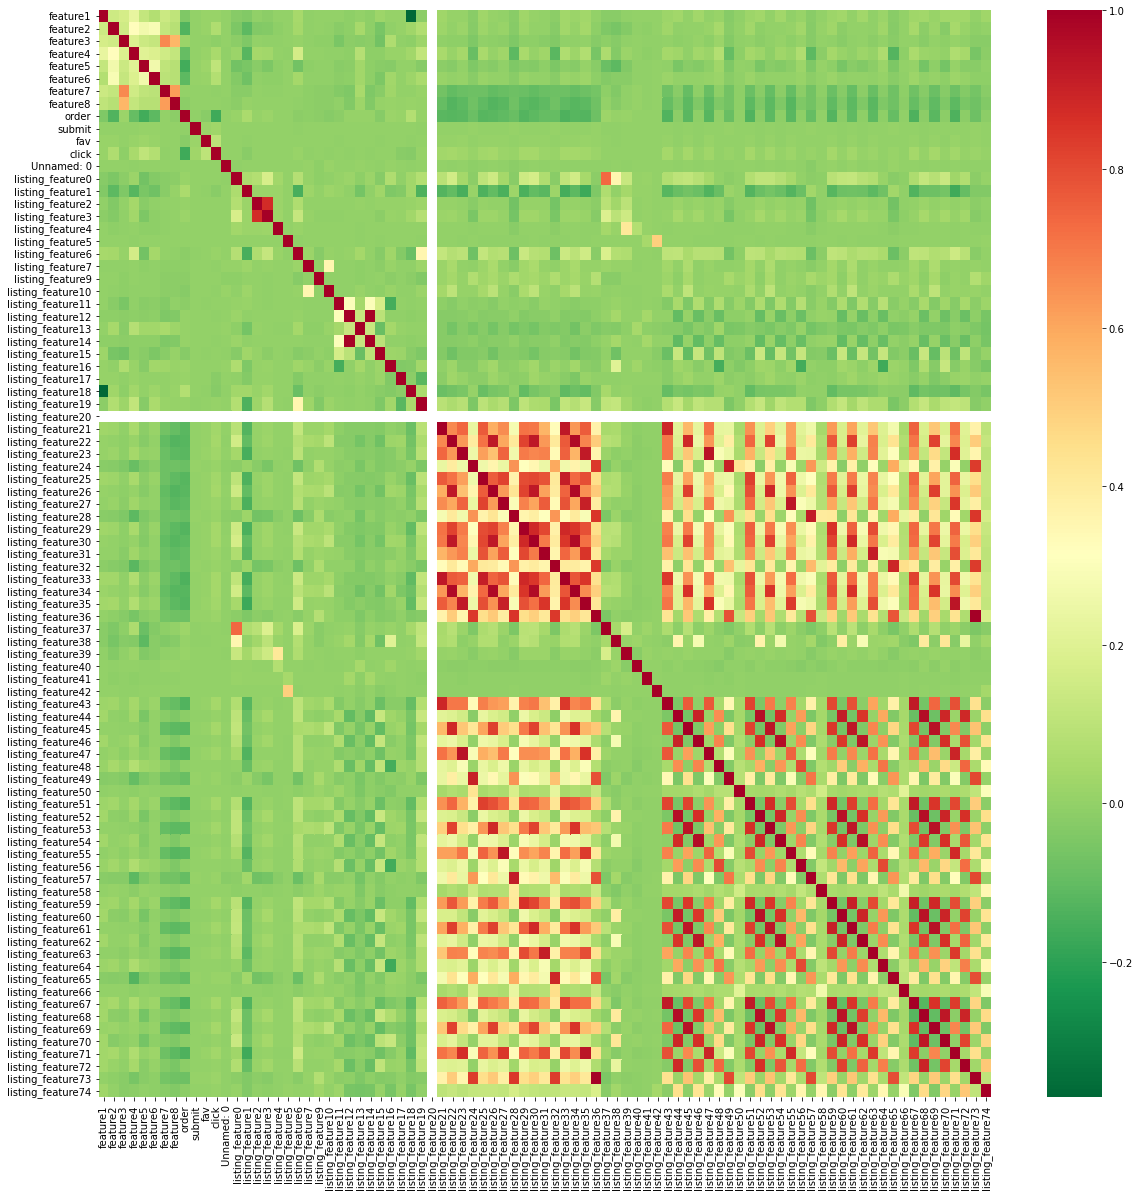

In [39]:
plt.figure(figsize=(20,20)) 
sns.heatmap(c, cmap='RdYlGn_r') 
plt.show()